
# <span style="color:rgb(213,80,0)">Exercise 9.1</span>

Analysis of the reduced logged ozone data using RAVAS. This file creates Figures A.57, A.58 and Table A.20

## Load Ozone data (reduced data)

In [1]:
X=load('ozone.txt');
% Transform the response using logs
X(:,end)=log(X(:,end));
% Add a time trend
X=[(-40:39)' X];
% Define y
y=X(:,end);
% Define X
X=X(:,1:end-1);
labels={'Time','1','2','3','4','5','6','7','8'};
% Select Time + variables 4,5, and 6
sel=[1 [ 4 5 6]+1];
Xsel=X(:,sel);
nameX="X"+string(labels(sel));
nameXy=[nameX "y"];
nameXy(1)="Time";

prin=0;

## Prepare input for Figures A.57 and A.58

In [2]:
out=avasms(y,Xsel,'plots',0);
j=1;
outjm=out{j,"Out"};
outm=outjm{:};

## Create Figures A.57 and A.58


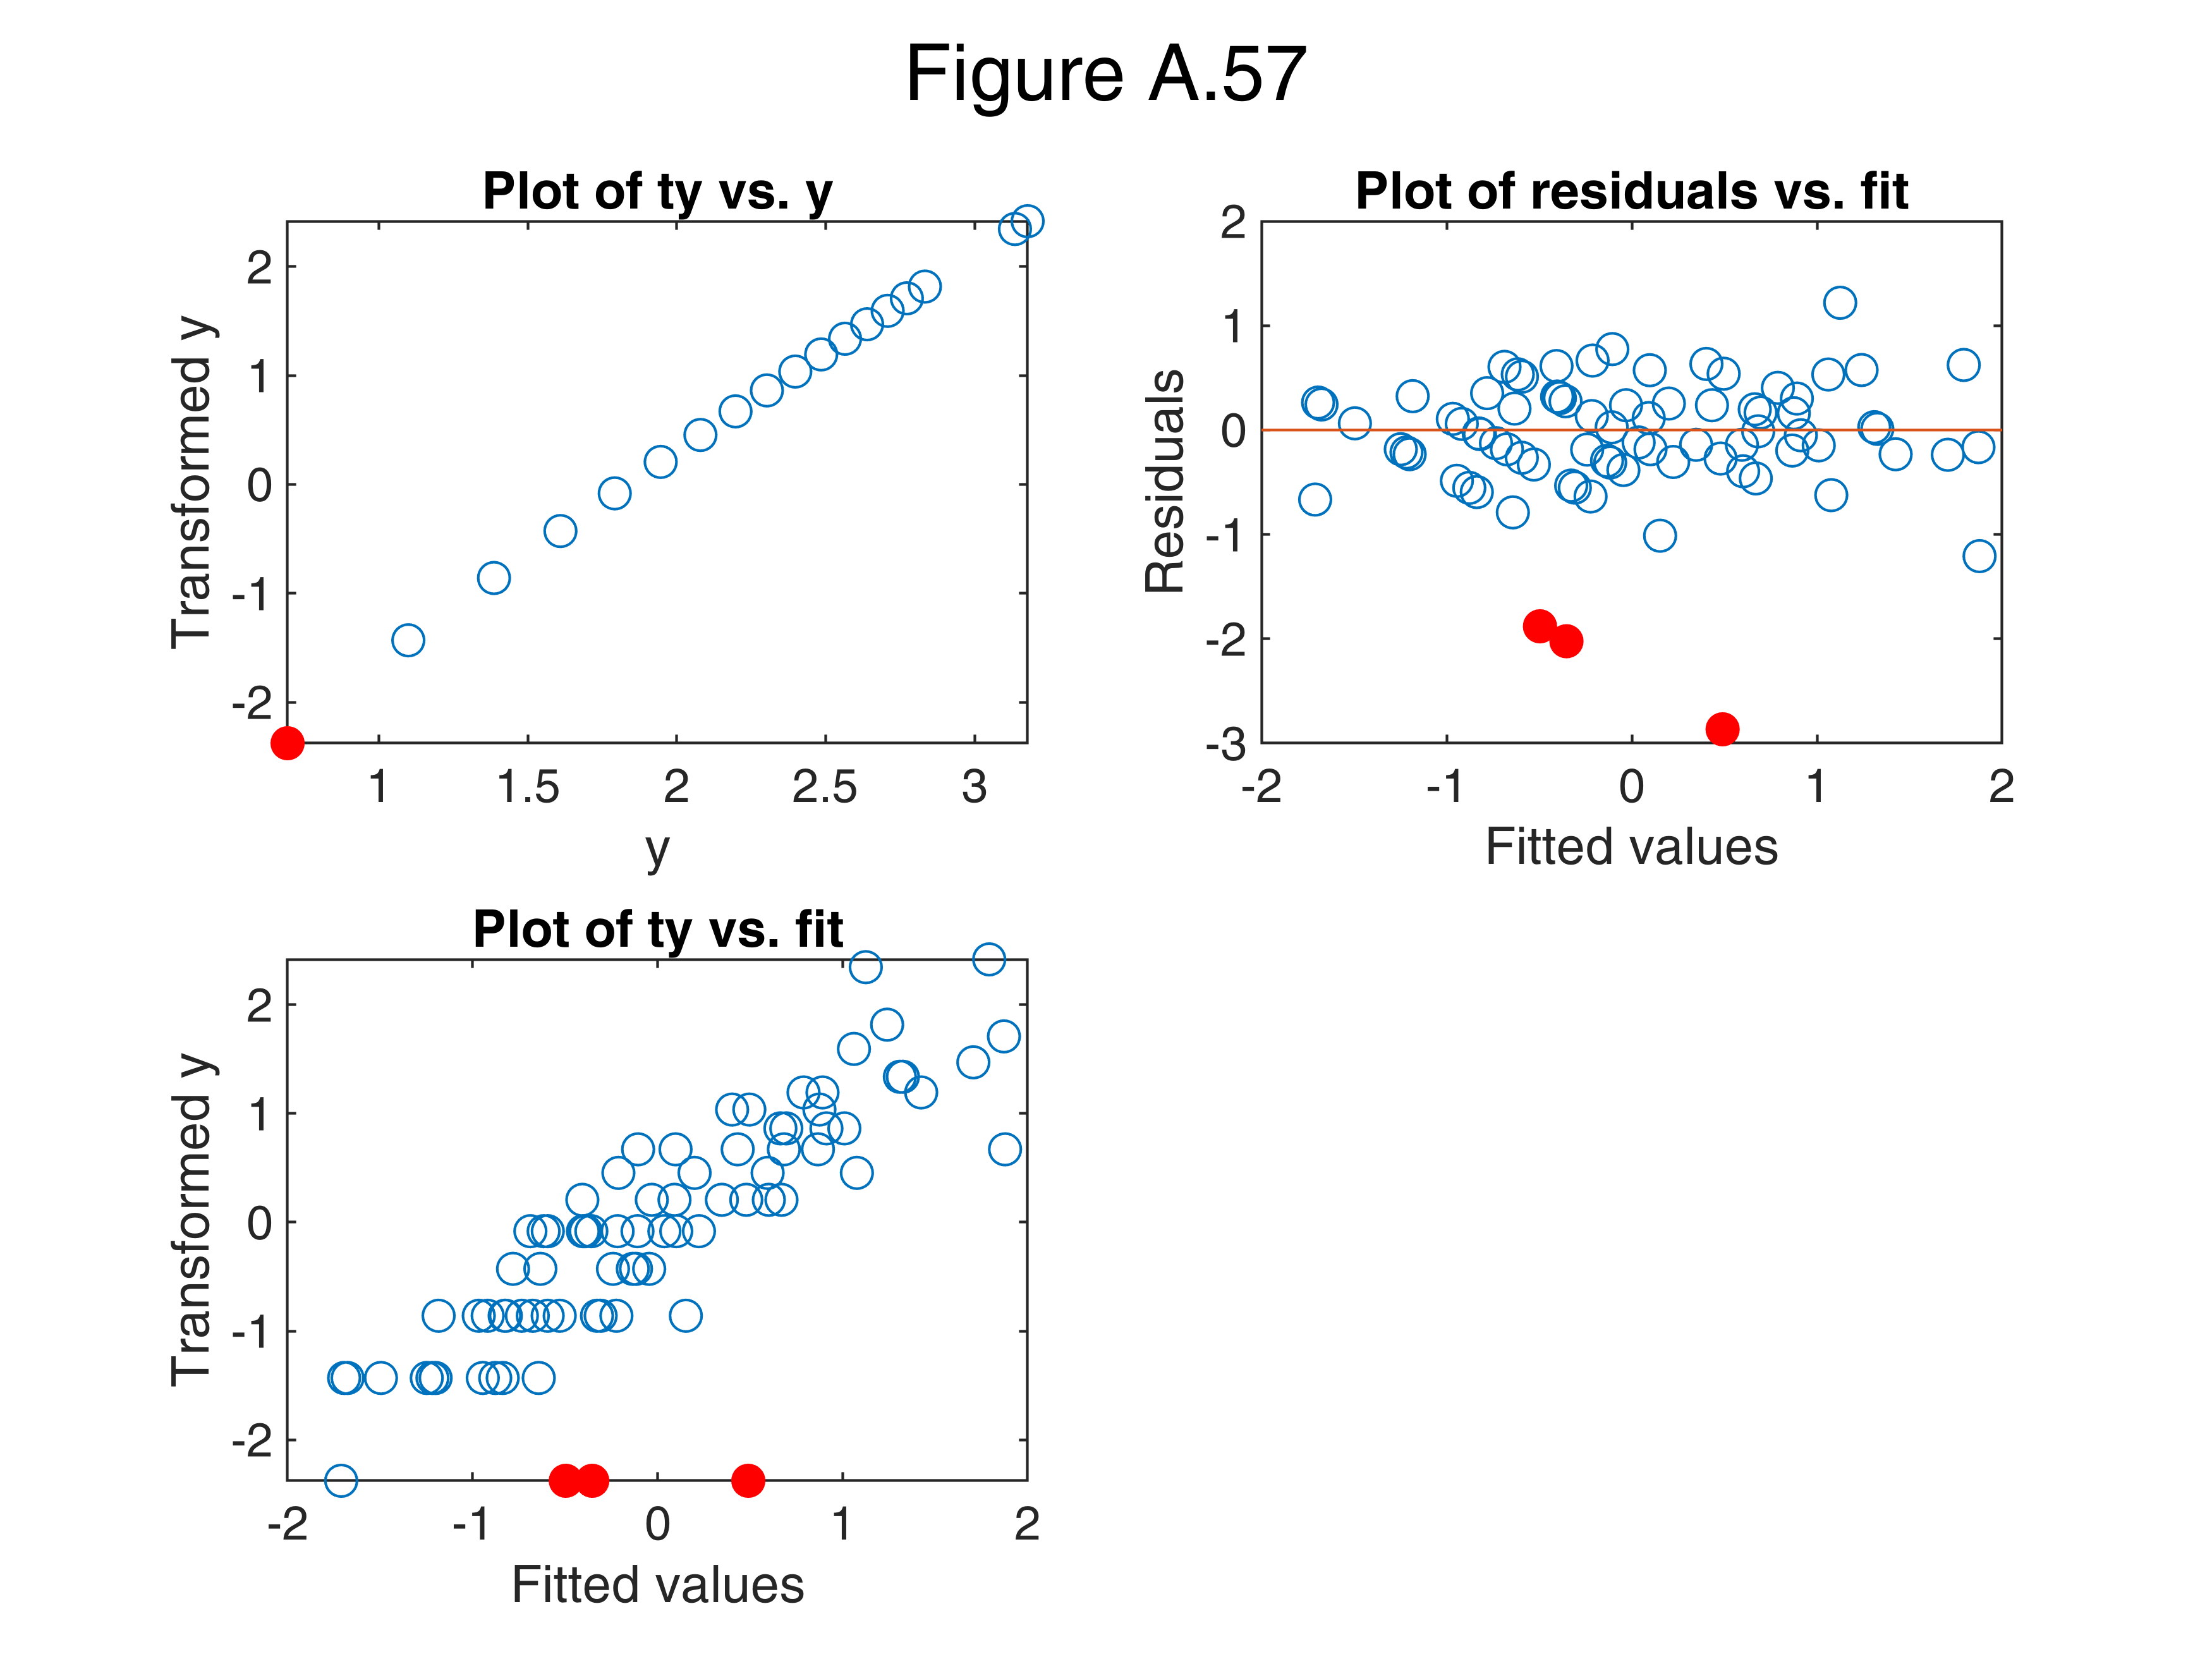

In [3]:
aceplot(outm,'VarNames',nameXy)
pl_ty=findobj(0, 'type', 'figure','tag','pl_ty');
figure(pl_ty(1))
sgtitle('Figure A.57')
set(gcf,"Name",'Figure A.57')


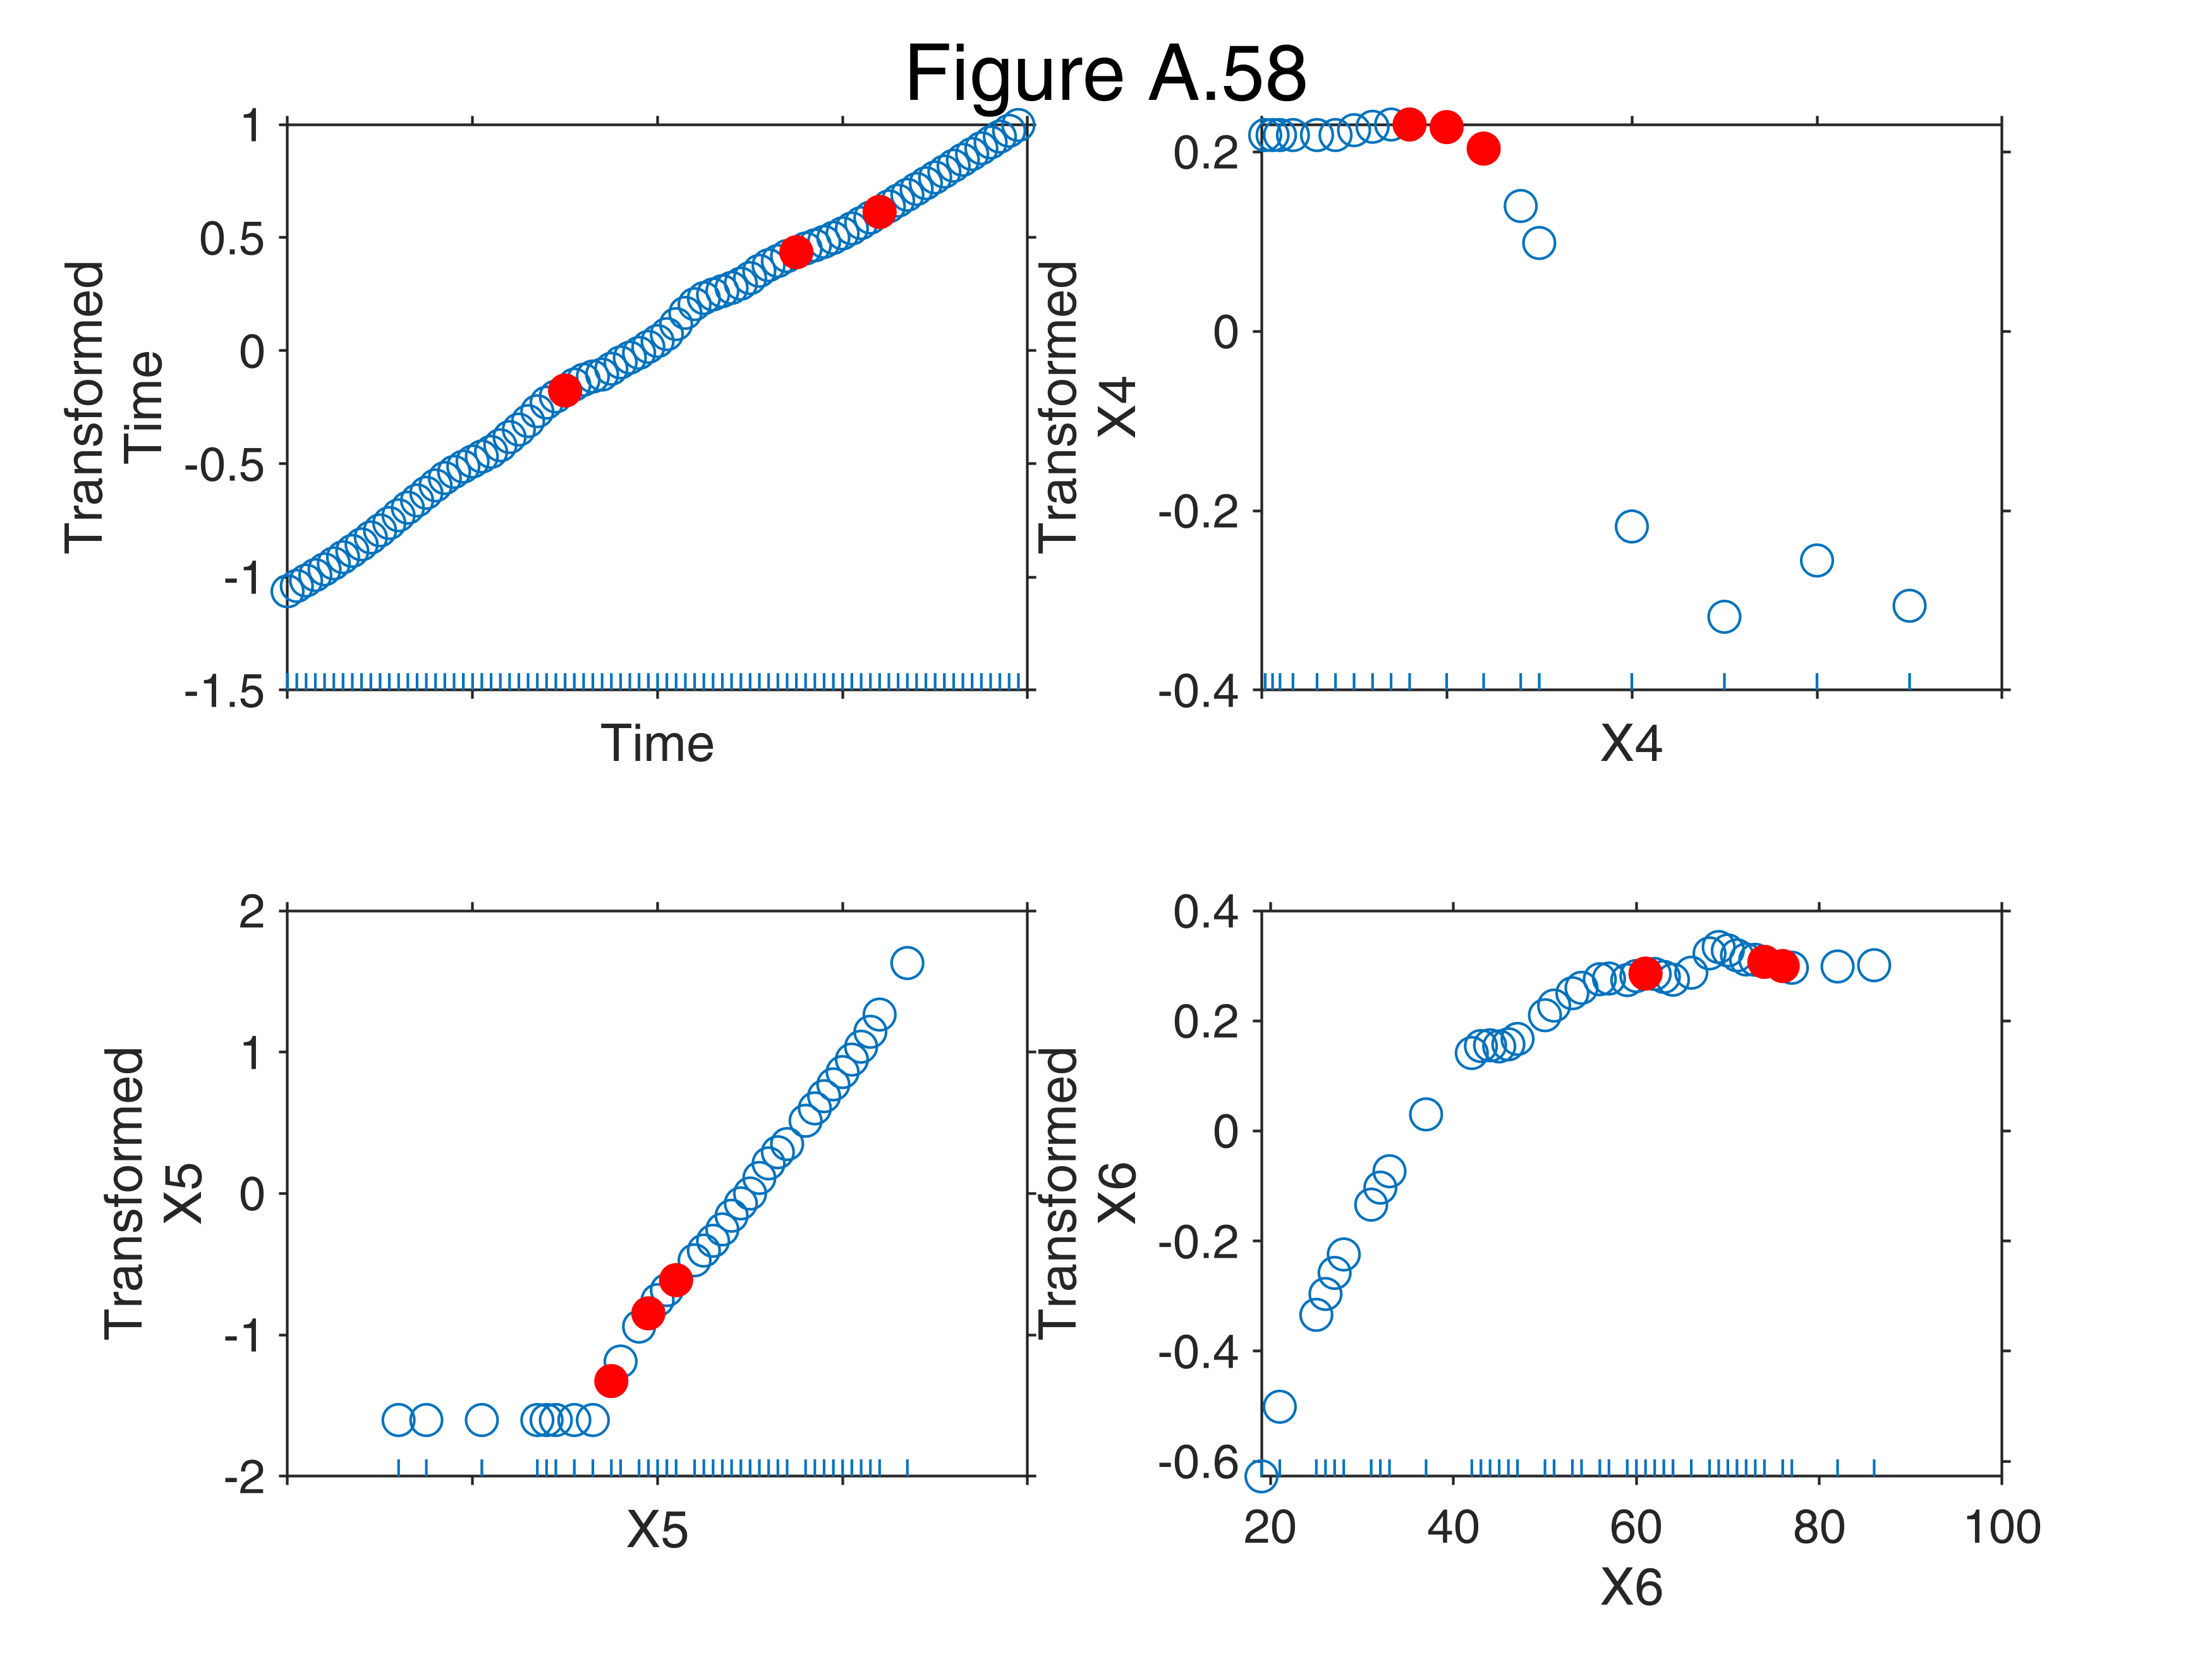

In [4]:

pl_tX=findobj(0, 'type', 'figure','tag','pl_tX');
figure(pl_tX(1))
sgtitle('Figure A.58')
set(gcf,"Name",'Figure A.58')

In [5]:

disp("number of outliers found")

number of outliers found

In [6]:
disp(length(outm.outliers))

     3

In [7]:

if prin==1
    % print to postscript
    print -depsc ozoneredRAVAS.eps;
    print -depsc ozoneredRAVAStX.eps;
end

## Create Table A.20

In [8]:
outLM=fitlm(outm.tX,outm.ty,'Exclude',outm.outliers,'VarNames',nameXy);
disp("Table A.20")

Table A.20

In [9]:
disp(outLM)

Linear regression model:
    y ~ 1 + Time + X4 + X5 + X6
Estimated Coefficients:
                    Estimate         SE          tStat         pValue  
                   ___________    ________    ___________    __________
    (Intercept)    -4.6083e-18    0.051029    -9.0308e-17             1
    Time               0.99852    0.088477         11.286    1.3881e-17
    X4                  1.1771     0.24475         4.8095    8.0623e-06
    X5                 0.99857    0.080376         12.424    1.3934e-19
    X6                  1.0206     0.16383           6.23    2.8049e-08
Number of observations: 77, Error degrees of freedom: 72
Root Mean Squared Error: 0.448
R-squared: 0.813,  Adjusted R-Squared: 0.802
F-statistic vs. constant model: 78, p-value = 2.03e-25

In [10]:

%InsideREADME